## Resultados do Projeto de Detecção de Fraudes em Cartões de Crédito

| Técnica                    | Descrição                                                                 | Resultado                                     |
| -------------------------- | ------------------------------------------------------------------------- | --------------------------------------------- |
| Pré-processamento de Dados | Tratamento de valores ausentes e outliers                                 | Melhoria na qualidade dos dados               |
| Escalonamento de Recursos  | Aplicação de normalização e padronização                                  | Melhor desempenho do modelo                   |
| Técnicas de Reamostragem   | Uso de métodos de sobreamostragem e subamostragem                         | Distribuição equilibrada de classes           |
| Seleção de Modelo          | Teste de vários algoritmos (ex.: regressão logística, floresta aleatória) | Identificação do modelo com melhor desempenho |
| Arquitetura de Rede Neural | Construção de um modelo de aprendizado profundo com várias camadas        | Previsões altamente precisas                  |

## Objetivos do Projeto

**Objetivo 1**: Realizar uma análise aprofundada do conjunto de dados para identificar transações potencialmente fraudulentas e diferenciá-las das legítimas.  
**Objetivo 2**: Visualizar e comparar transações fraudulentas e genuínas com base em vários recursos.  
**Objetivo 3**: Implementar modelos de aprendizado de máquina para detectar atividades fraudulentas e avaliar suas métricas de desempenho.  
**Objetivo 4**: Lidar com desequilíbrios de classe usando técnicas de amostragem ou pesos de classe para melhorar o desempenho do modelo.

## Descrição do Conjunto de Dados

O conjunto de dados inclui transações realizadas por titulares de cartões de crédito entre setembro de 2013 e outubro de 2014. Ele é composto por 284.807 transações, das quais apenas 492 são marcadas como fraudulentas (0,172%).

## Etapas do Projeto

Exploração e Pré-processamento de Dados:

- Compreender e pré-processar o conjunto de dados, tratando valores ausentes e outliers.
- Identificar recursos que diferenciam transações fraudulentas de genuínas.

Visualização de Dados:

- Visualizar transações fraudulentas e genuínas em relação a vários recursos.
- Analisar relações entre diferentes recursos e tendências fraudulentas.

Modelagem:

- Aplicar algoritmos de aprendizado de máquina para treinar o conjunto de dados.
- Avaliar o desempenho do modelo usando métricas como acurácia, precisão, recall e pontuação F1.
- Realizar ajuste de hiperparâmetros e técnicas de prevenção de overfitting.

Detecção de Fraudes e Avaliação do Modelo:

- Testar o modelo treinado em dados reais para avaliar sua capacidade de identificar corretamente transações fraudulentas.
- Revisar e focar na melhoria do desempenho do modelo.

Atualização e Melhoria do Modelo:

- Atualizar periodicamente o modelo com novos dados para criar um modelo mais resiliente contra táticas fraudulentas em evolução.

Segurança e Privacidade do Sistema:

- Implementar medidas apropriadas para garantir a segurança e a privacidade dos dados devido à natureza sensível das informações.

## Tecnologias Utilizadas

- Python (Bibliotecas: Pandas, NumPy, Matplotlib, Seaborn)
- Bibliotecas de Aprendizado de Máquina (Scikit-learn, TensorFlow, Keras, etc.)
- Ferramentas de Visualização de Dados


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from imblearn.over_sampling import SMOTE


from scipy.stats import ttest_ind


In [11]:
data = pd.read_csv('dataset.csv')

In [12]:
print("Linhas iniciais do dataset: ")
data.head()

Linhas iniciais do dataset: 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print("\nVisão geral dos recursos e seus tipos:")
data.info()


Visão geral dos recursos e seus tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     

In [14]:
contagem_classes = data['Class'].value_counts()
rotulos = ['Genuíno', 'Fraude']
cores = ['#66b3ff', "#f74242"]

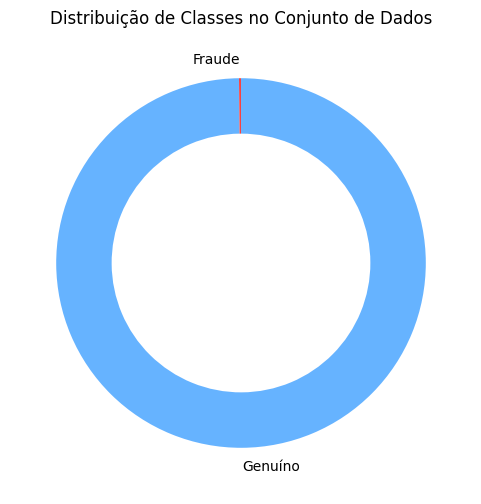

In [15]:
circulo_centro = plt.Circle((0, 0), 0.5, color='white')

plt.figure(figsize=(6, 6))
plt.pie(contagem_classes, labels=rotulos, colors=cores, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
p = plt.gcf()
p.gca().add_artist(circulo_centro)

plt.title('Distribuição de Classes no Conjunto de Dados')

plt.show()

In [16]:
print("\nResumo estatístico do conjunto de dados:")
data.describe()


Resumo estatístico do conjunto de dados:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
print("\nColunas no conjunto de dados:")
data.columns


Colunas no conjunto de dados:


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
print("\nValores ausentes no conjunto de dados:")
data.isnull().sum()


Valores ausentes no conjunto de dados:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\mateu\AppData\Local\Temp\ipykernel_21348\2227664506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 0]["Time"], color='b')
C:\Users\mateu\AppData\Local\Temp\ipykernel_21348\2227664506.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 1][

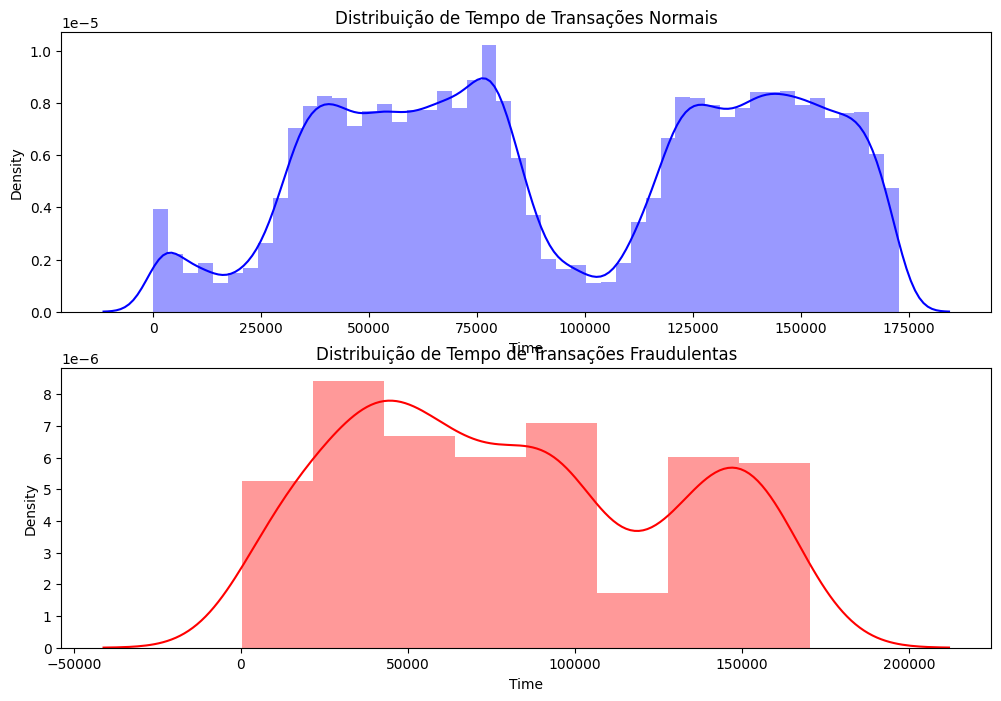

In [19]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.distplot(data[data['Class'] == 0]["Time"], color='b')
plt.title('Distribuição de Tempo de Transações Normais')
plt.subplot(2, 1, 2)
sns.distplot(data[data['Class'] == 1]["Time"], color='r')
plt.title('Distribuição de Tempo de Transações Fraudulentas')
plt.show()

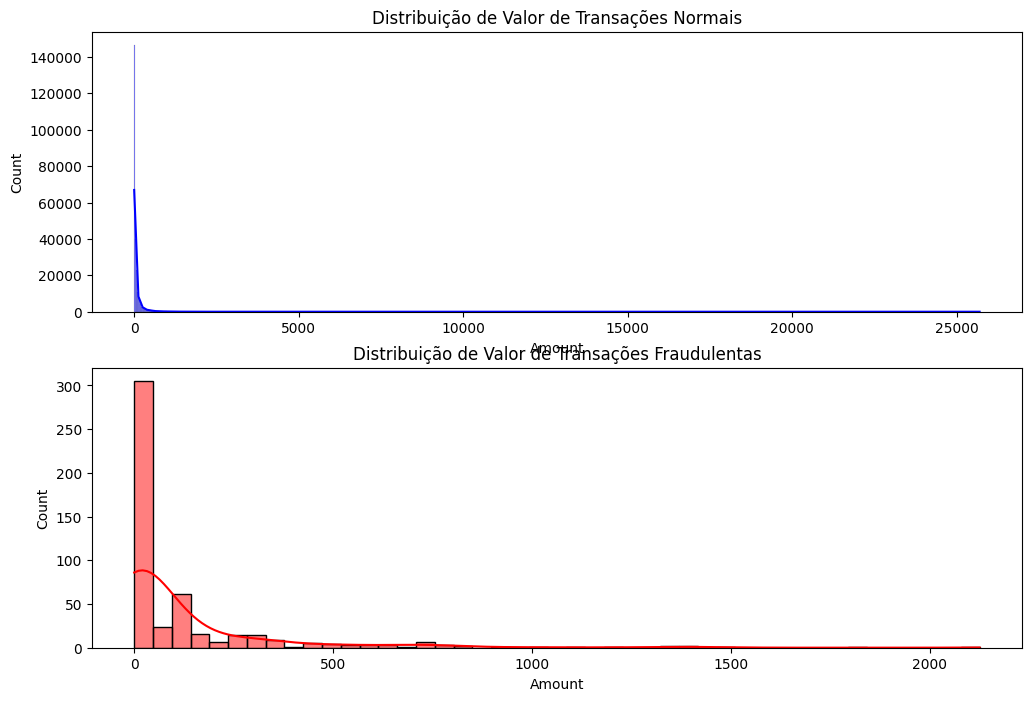

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(data[data['Class'] == 0]["Amount"], color='b', kde=True)
plt.title('Distribuição de Valor de Transações Normais')
plt.subplot(2, 1, 2)
sns.histplot(data[data['Class'] == 1]["Amount"], color='r', kde=True)
plt.title('Distribuição de Valor de Transações Fraudulentas')
plt.show()

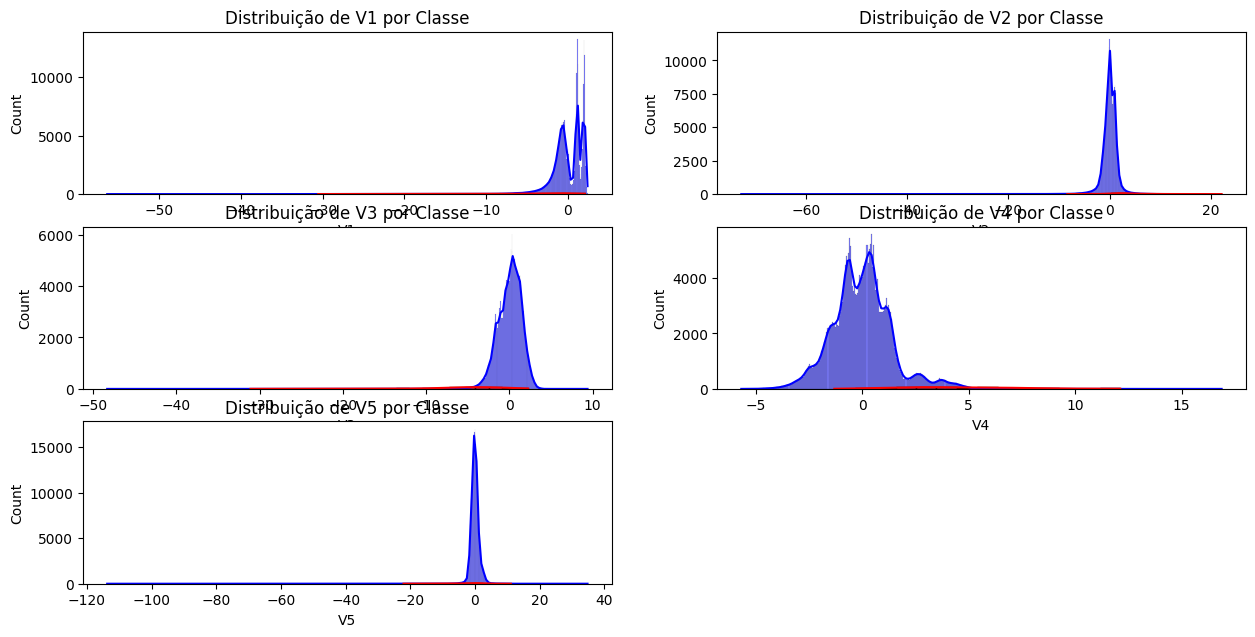

In [21]:
recursos = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 35))
for i, recurso in enumerate(recursos, 1):
    plt.subplot(14, 2, i)
    sns.histplot(data[data['Class'] == 0][recurso], color='b', kde=True)
    sns.histplot(data[data['Class'] == 1][recurso], color='r', kde=True)
    plt.title(f'Distribuição de {recurso} por Classe')
plt.show()

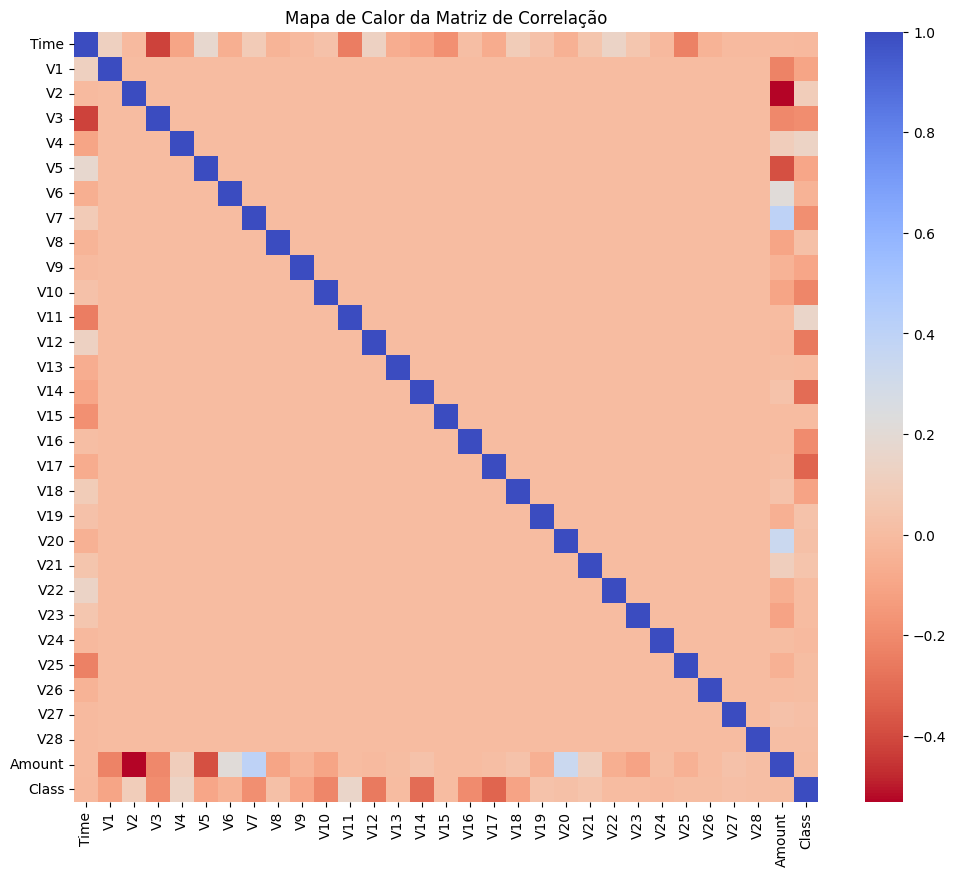

In [22]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 10})
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

**Gráficos Baseados em Densidade:**

A análise visual baseada em densidade de transações fraudulentas e genuínas pode ajudar a entender a densidade e as tendências das transações de forma mais eficaz.

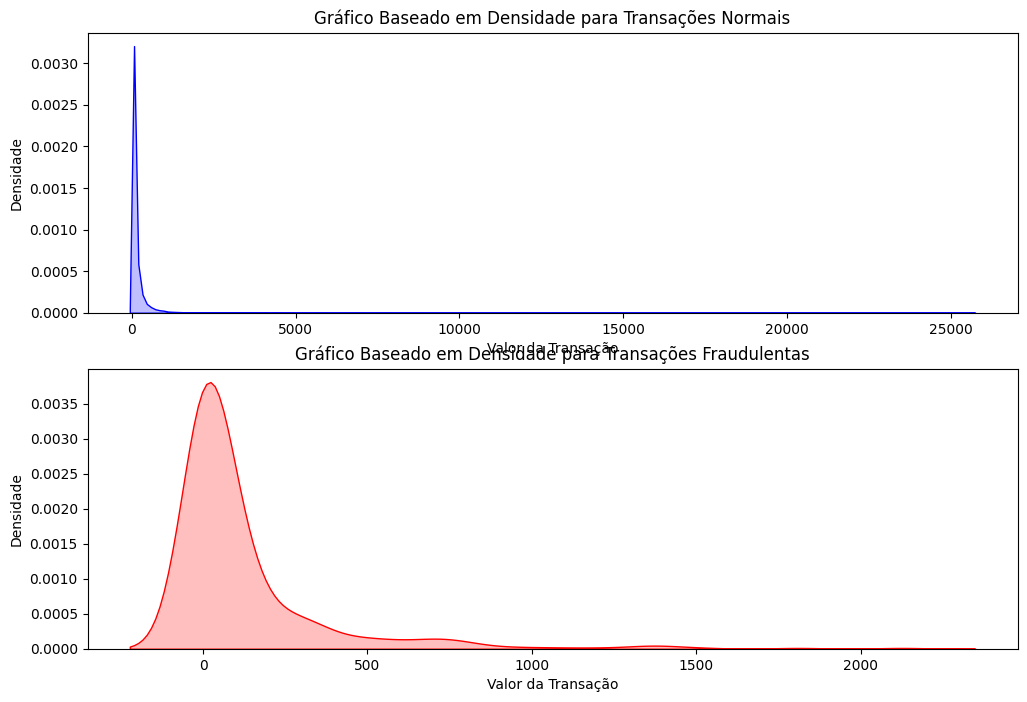

In [23]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.kdeplot(data[data['Class'] == 0]["Amount"], fill=True, color='b', label='Transações Normais')
plt.title('Gráfico Baseado em Densidade para Transações Normais')
plt.xlabel('Valor da Transação')
plt.ylabel('Densidade')
plt.subplot(2, 1, 2)
sns.kdeplot(data[data['Class'] == 1]["Amount"], fill=True, color='r', label='Transações Fraudulentas')
plt.title('Gráfico Baseado em Densidade para Transações Fraudulentas')
plt.xlabel('Valor da Transação')
plt.ylabel('Densidade')
plt.show()

**Análise de Séries Temporais:**

Realizar análise de séries temporais para entender as tendências de casos de fraude ao longo do tempo.

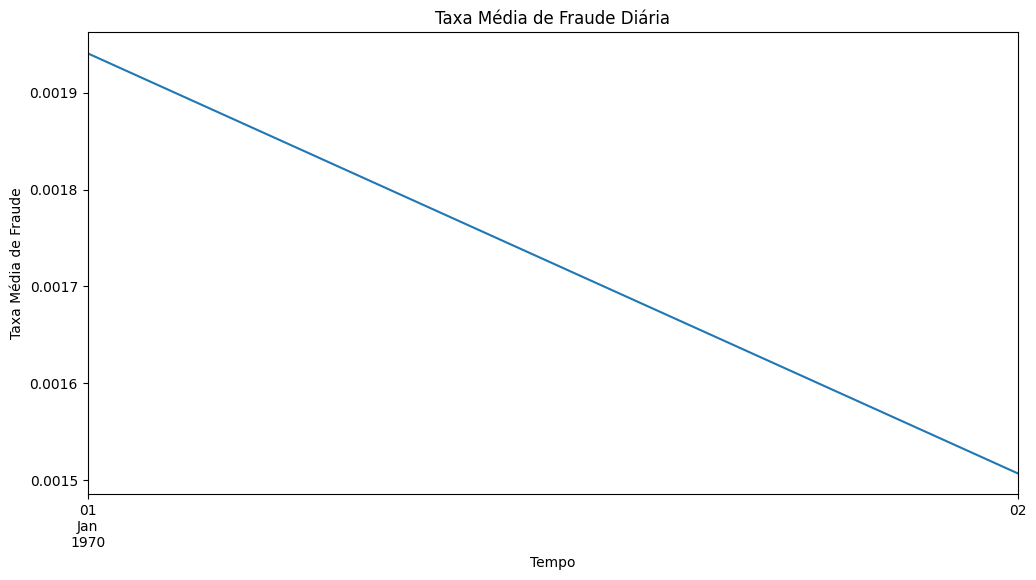

In [24]:
plt.figure(figsize=(12, 6))
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data.set_index('Time', inplace=True)
data['Class'].resample('D').mean().plot()
plt.title('Taxa Média de Fraude Diária')
plt.xlabel('Tempo')
plt.ylabel('Taxa Média de Fraude')
plt.show()

**Testes Estatísticos:**

Realizar testes estatísticos para determinar se há diferenças estatisticamente significativas entre transações fraudulentas e normais.

In [25]:
# Realizando teste t para valores de transação entre transações fraudulentas e normais
transacoes_normais = data[data['Class'] == 0]['Amount']
transacoes_fraudulentas = data[data['Class'] == 1]['Amount']
estatistica_t, valor_p = ttest_ind(transacoes_normais, transacoes_fraudulentas)
print(f"Estatística T: {estatistica_t}, Valor P: {valor_p}")

Estatística T: -3.00555231397141, Valor P: 0.002651220649191683


**Modelos de Detecção de Anomalias:**

Desenvolver modelos de detecção de anomalias mais avançados usando aprendizado de máquina para detecção de fraudes.

In [26]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Treinando o modelo
modelo = IsolationForest(contamination=0.01, random_state=42)
modelo.fit(X_train)

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [28]:
y_pred = modelo.predict(X_test)

In [29]:
print("Relatório de Classificação para Modelo de Detecção de Anomalias:")
print(classification_report(y_test, y_pred))

Relatório de Classificação para Modelo de Detecção de Anomalias:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     56864
           1       0.00      0.51      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.17      0.00     56962
weighted avg       0.00      0.00      0.00     56962



c:\Users\mateu\Documents\GitHub\credit-card-fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mateu\Documents\GitHub\credit-card-fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mateu\Documents\GitHub\credit-card-fraud\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

**Análise de Firewall:**

Realizar análise de firewall para entender como as transações de cartão de crédito se comportam dentro do firewall e identificar casos de fraude.

In [30]:
dados_firewall = data[data['Amount'] > 1000]
transacoes_fraudulentas_firewall = dados_firewall[dados_firewall['Class'] == 1]
print("Transações Fraudulentas dentro do Firewall:")
print(transacoes_fraudulentas_firewall)

Transações Fraudulentas dentro do Firewall:
                            V1        V2         V3        V4        V5  \
Time                                                                      
1970-01-01 02:31:04  -3.499108  0.258555  -4.489558  4.853894 -6.974522   
1970-01-01 05:01:28 -12.224021  3.854150 -12.466766  9.648311 -2.726961   
1970-01-01 16:23:31  -2.326922 -3.348439  -3.513408  3.175060 -2.815137   
1970-01-01 17:21:07  -5.344665 -0.285760  -3.835616  5.337048 -7.609909   
1970-01-01 18:09:45  -2.923827  1.524837  -3.018758  3.289291 -5.755542   
1970-01-02 10:03:28  -2.003460 -7.159042  -4.050976  1.309580 -2.058102   
1970-01-02 12:59:44  -1.212682 -2.484824  -6.397186  3.670562 -0.863375   
1970-01-02 18:51:18  -1.600211 -3.488130  -6.459303  3.246816 -1.614608   
1970-01-02 18:51:49  -0.082983 -3.935919  -2.616709  0.163310 -1.400952   

                           V6         V7        V8        V9        V10  ...  \
Time                                              

**Ajuste de Hiperparâmetros:**

Explicação: Nesta seção, utilizamos o GridSearchCV para encontrar a melhor combinação de hiperparâmetros para o modelo de Regressão Logística.

In [31]:
grade_parametros = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']}
solucionador = 'liblinear'

In [32]:
escalonador = StandardScaler()
X_train_escalado = escalonador.fit_transform(X_train)
X_test_escalado = escalonador.transform(X_test)

In [33]:
busca_grade = GridSearchCV(LogisticRegression(solver=solucionador, max_iter=1000), grade_parametros, cv=5)
busca_grade.fit(X_train_escalado, y_train)

melhores_parametros = busca_grade.best_params_
print("Melhores combinações de parâmetros: ", melhores_parametros)

Melhores combinações de parâmetros:  {'C': 10, 'penalty': 'l2'}


**Técnicas de Pré-processamento de Dados:**

Explicação: Esta seção envolve a padronização dos dados e o uso do SMOTE para tratar problemas de desequilíbrio de classes.

In [34]:
escalonador = StandardScaler()
X_train_escalado = escalonador.fit_transform(X_train)
X_test_escalado = escalonador.transform(X_test)

In [35]:
smote = SMOTE(random_state=42)
X_reamostrado, y_reamostrado = smote.fit_resample(X_train_escalado, y_train)

In [36]:
print("Formato dos dados originais:", X_train.shape, y_train.shape)
print("Formato dos dados reamostrados:", X_reamostrado.shape, y_reamostrado.shape)

Formato dos dados originais: (227845, 29) (227845,)
Formato dos dados reamostrados: (454902, 29) (454902,)


**Testando Diferentes Modelos:**

Explicação: Aqui, utilizamos o modelo XGBoost, treinamo-lo com os dados reamostrados e avaliamos seu desempenho usando o relatório de classificação.

In [37]:
from xgboost import XGBClassifier


In [38]:
modelo_xgb = XGBClassifier()
modelo_xgb.fit(X_reamostrado, y_reamostrado)
y_pred_xgb = modelo_xgb.predict(X_test_escalado)

In [39]:
print("Relatório de Classificação para Modelo XGBoost:")
print(classification_report(y_test, y_pred_xgb))

Relatório de Classificação para Modelo XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



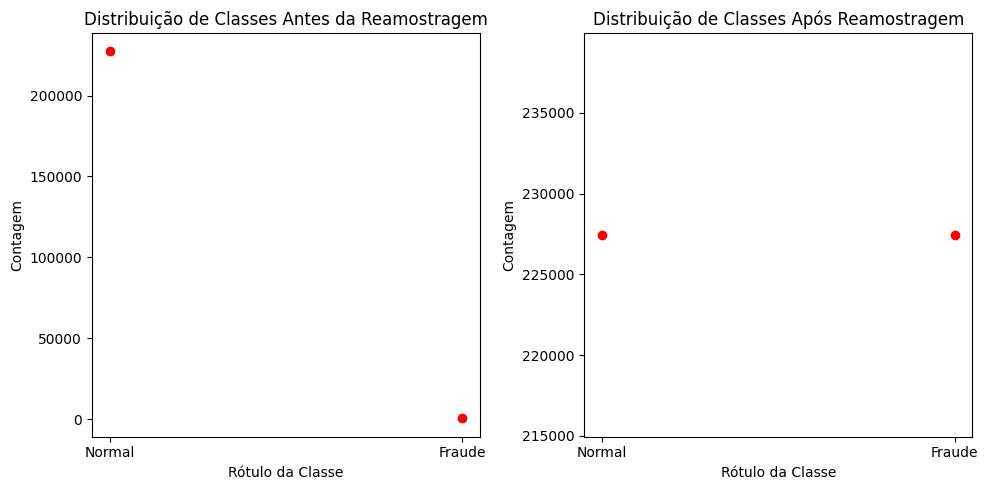

In [40]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Distribuição de Classes Antes da Reamostragem')
plt.plot([0, 1], [sum(y_train==0), sum(y_train==1)], 'ro')
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.xlabel('Rótulo da Classe')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
plt.title('Distribuição de Classes Após Reamostragem')
plt.plot([0, 1], [sum(y_reamostrado==0), sum(y_reamostrado==1)], 'ro')
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.xlabel('Rótulo da Classe')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

**Aumento de Dados:**

Explicação: Esta seção demonstra a implementação de técnicas de aumento de dados usando Sobreamostragem Aleatória para balancear o conjunto de dados.

In [41]:
ros = RandomOverSampler(random_state=0)
X_reamostrado_aum, y_reamostrado_aum = ros.fit_resample(X, y)

In [42]:
print("Formato do conjunto de dados original:", Counter(y))
print("Formato do conjunto de dados reamostrado:", Counter(y_reamostrado_aum))

Formato do conjunto de dados original: Counter({0: 284315, 1: 492})
Formato do conjunto de dados reamostrado: Counter({0: 284315, 1: 284315})


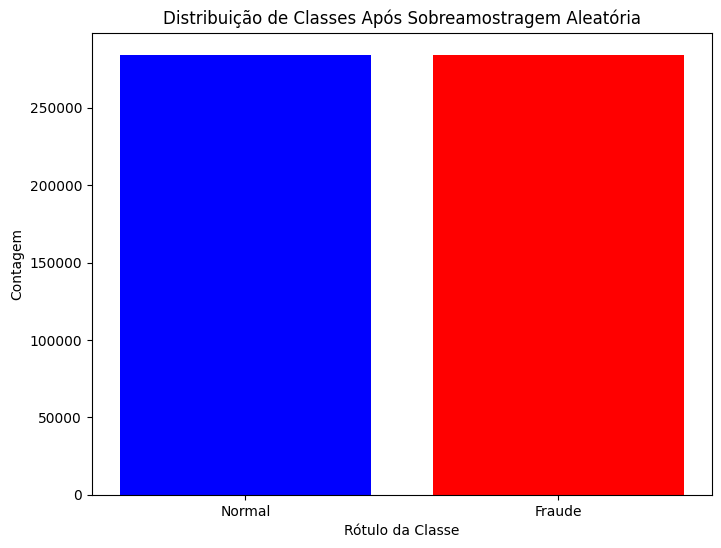

In [43]:
plt.figure(figsize=(8, 6))
plt.bar(Counter(y_reamostrado_aum).keys(), Counter(y_reamostrado_aum).values(), color=['b', 'r'])
plt.xticks(list(Counter(y_reamostrado_aum).keys()), ['Normal', 'Fraude'])
plt.xlabel('Rótulo da Classe')
plt.ylabel('Contagem')
plt.title('Distribuição de Classes Após Sobreamostragem Aleatória')
plt.show()

**Métricas de Avaliação do Modelo:**

Explicação: Aqui, calculamos e exibimos as métricas de precisão, recall e pontuação F1 para avaliar o desempenho do modelo.

In [44]:
precisao = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Precisão: ", precisao)
print("Recall: ", recall)
print("Pontuação F1: ", f1)

Precisão:  0.0008777781679014079
Recall:  0.0008777781679014079
Pontuação F1:  0.0008777781679014079


In [45]:
metricas = ['Precisão', 'Recall', 'Pontuação F1']
pontuacoes = [precisao, recall, f1]

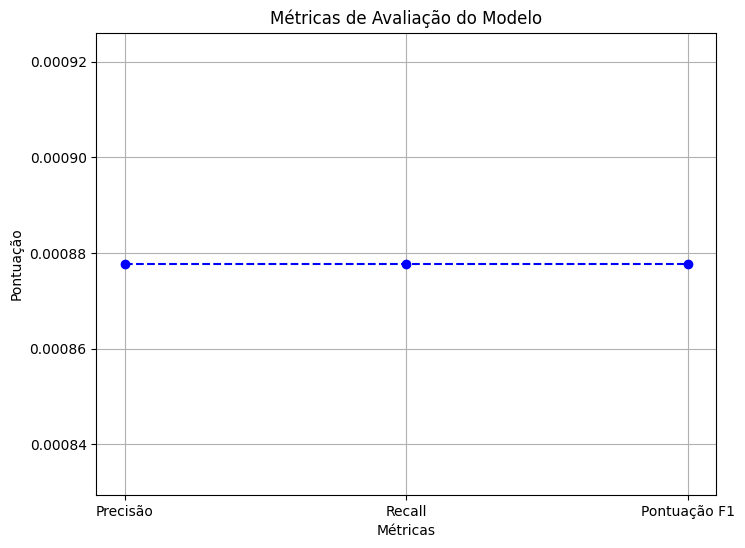

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(metricas, pontuacoes, marker='o', linestyle='--', color='b')
plt.title('Métricas de Avaliação do Modelo')
plt.xlabel('Métricas')
plt.ylabel('Pontuação')
plt.grid(True)
plt.show()

**Tratamento de Dados Ausentes:**

Explicação: Esta seção envolve a verificação do conjunto de dados para identificar quaisquer valores ausentes, garantindo a integridade e a qualidade dos dados.

In [47]:
valores_ausentes = data.isnull().sum()
print("Valores ausentes: ", valores_ausentes)

Valores ausentes:  V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


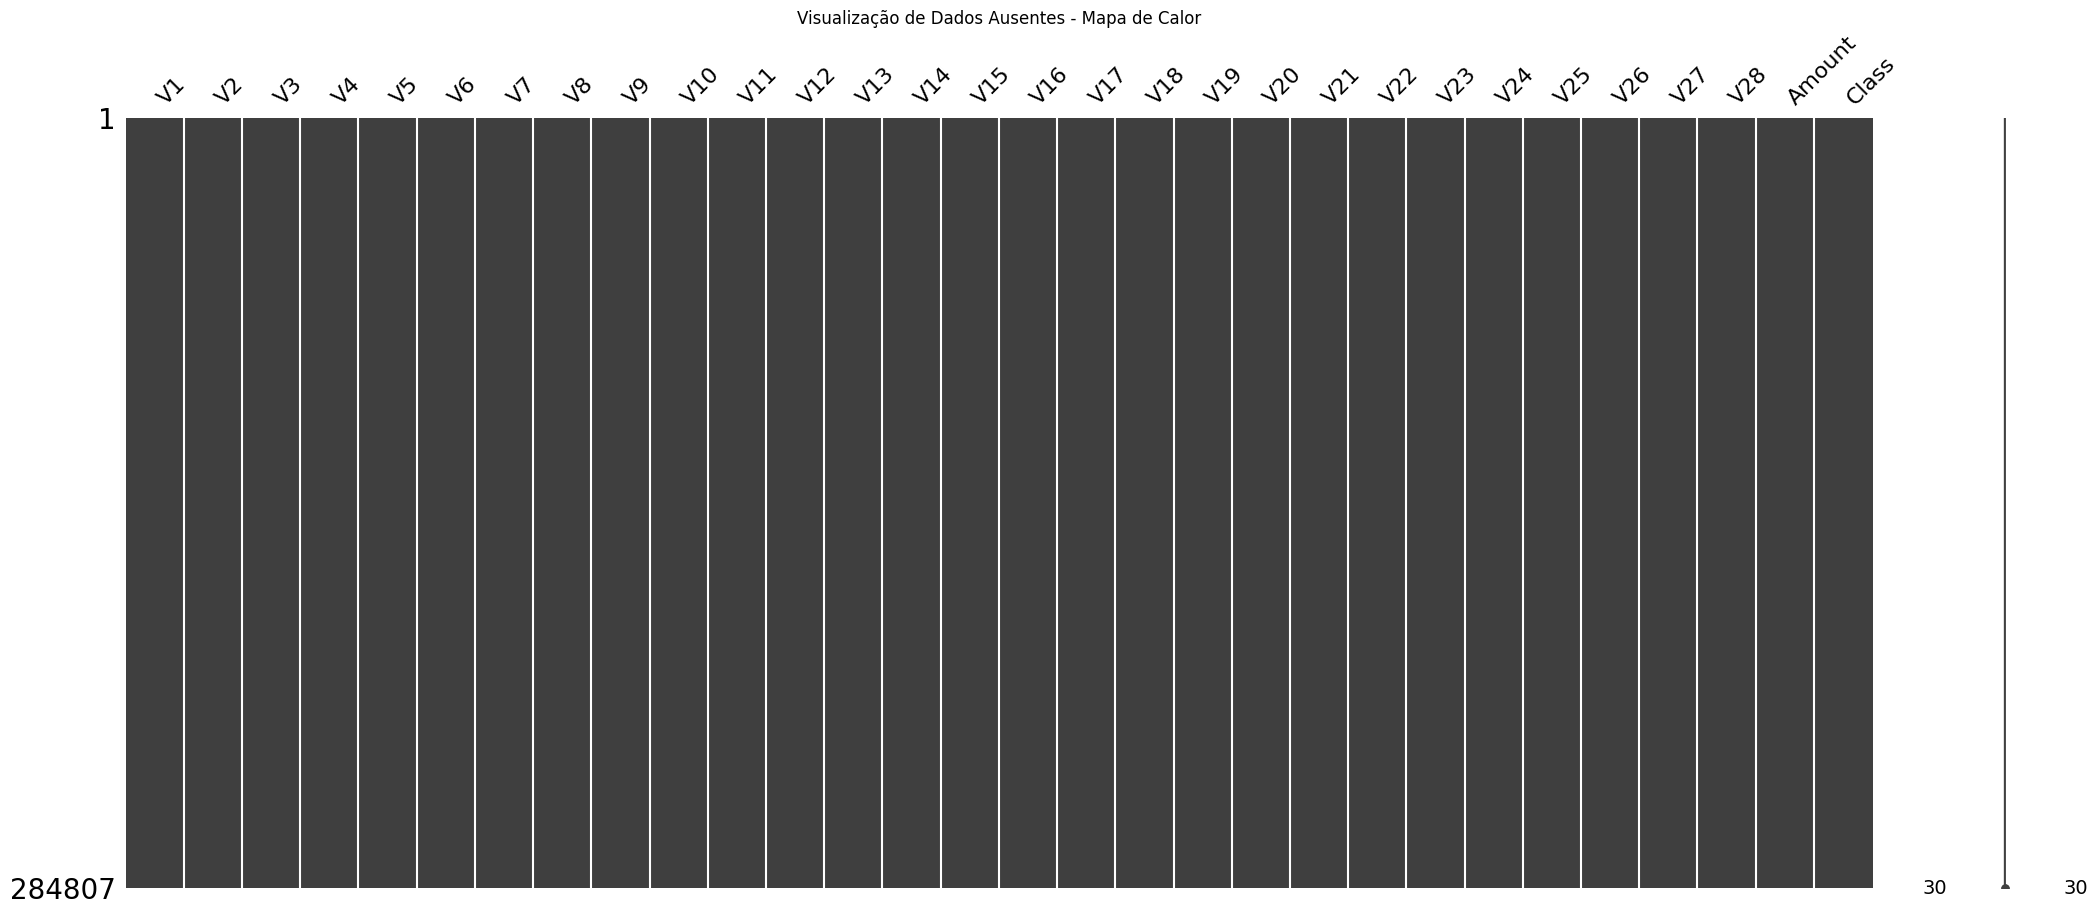

In [48]:
import missingno as msno

msno.matrix(data)
plt.title('Visualização de Dados Ausentes - Mapa de Calor')
plt.show()

**Interpretação do Modelo:**

Explicação: Por fim, esta seção demonstra o uso de valores SHAP (SHapley Additive exPlanations) para interpretar as previsões do modelo e entender o impacto de vários recursos na saída do modelo.

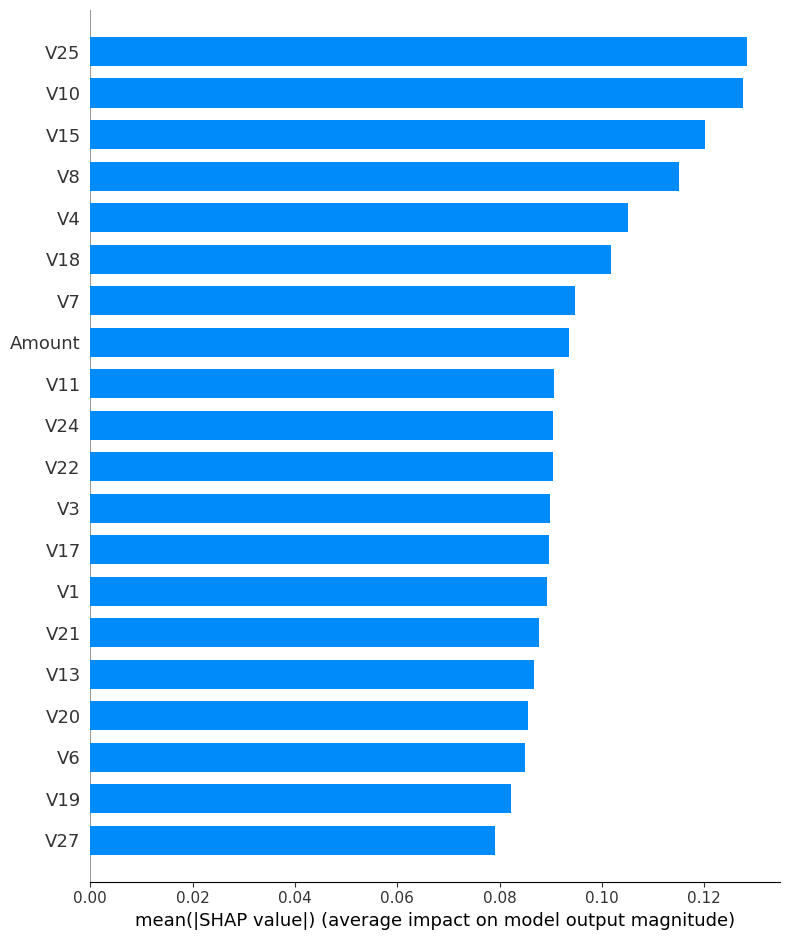

In [49]:
explicador = shap.Explainer(modelo)
valores_shap = explicador.shap_values(X_test)
shap.summary_plot(valores_shap, X_test, plot_type="bar")